# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ESANCHEZ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
news_api_key = os.getenv("api_key")


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

9736

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

4633

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
2,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
3,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
4,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.00,0.865
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.04,0.960
2,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.00,0.954
3,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.00,0.941
4,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.00,0.866


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.082610,0.048450,0.065450,0.886200
std,0.409642,0.049783,0.069041,0.072962
min,-0.859300,0.000000,0.000000,0.646000
25%,-0.386825,0.000000,0.000000,0.858000
50%,-0.051350,0.041500,0.063000,0.888500
75%,0.249275,0.077500,0.087500,0.923000
max,0.526700,0.164000,0.300000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.047200,0.050600,0.045200,0.904300
std,0.430762,0.053698,0.084644,0.082114
min,-0.948500,0.000000,0.000000,0.628000
25%,-0.210275,0.000000,0.000000,0.865750
50%,0.064250,0.044000,0.000000,0.923000
75%,0.376275,0.077250,0.068750,0.955750
max,0.690800,0.178000,0.372000,1.000000


In [10]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)

### Questions:

Q: Which coin had the highest mean positive score?

In [11]:
print(f"A: Ethereum has the highest Mean Positive score of {eth_positive_mean} which is slightly higher than the mean positive score of Bitcoin {btc_positive_mean}")

A: Ethereum has the highest Mean Positive score of 0.051 which is slightly higher than the mean positive score of Bitcoin 0.048


Q: Which coin had the highest compound score?

In [12]:
print(f"A: Ethereum has the highest Maximum Compound score of {eth_compound_max}, Bitcoin has score of  {btc_compound_max}")

A: Ethereum has the highest Maximum Compound score of 0.691, Bitcoin has score of  0.527


Q. Which coin had the highest positive score?

In [13]:
print(f"A: Ethereum has the highest Maximum Positive score of {eth_positive_max}.")

A: Ethereum has the highest Maximum Positive score of 0.178.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

# Expand the default stopwords list if necessary
sw_addons = {'down', 'crypto', 'bear', 'including', 'today', 'announced', 'week', 'month', 'lower', 'char','also', 'reutersdado'}


In [16]:
# Complete the tokenizer function
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output
    
  
    
    return tokens

In [17]:
# Compile the list of lists of tokens for each Bitcoin article
btc_word_tokenized = []
for text in bitcoin_df.text:
    # Create a list of tokenized words for each article    
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the btc_word_tokenized list of lists
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

[['new', 'york', 'lawmaker', 'passed', 'bill', 'would', 'temporarily', 'ban', 'new', 'bitcoin', 'mining', 'operation', 'early', 'friday', 'state', 'senator', 'voted', 'pas', 'legislation', 'bound', 'desk'], ['even', 'though', 'number', 'womenfocused', 'space', 'odeniran', 'say', 'woman', 'still', 'underrepresented', 'ive', 'space', 'im', 'black', 'person', 'woman', 'b'], ['rapper', 'entrepreneur', 'shawn', 'carter', 'better', 'known', 'jayz', 'bringing', 'bitcoin', 'place', 'grew', 'thursday', 'jayz', 'former', 'twitter', 'ceo', 'jack', 'dorsey', 'launch', 'bitcoin'], ['new', 'study', 'bitcoin', 'call', 'question', 'whether', 'digital', 'currency', 'truly', 'decentralized', 'anonymous', 'biggest', 'devotee', 'would', 'believe', 'researchers', 'baylor', 'rice'], ['image', 'caption', 'president', 'faustinarchange', 'touadra', 'want', 'rethink', 'country', 'economic', 'philosophythe', 'central', 'african', 'republics', 'decision', 'adopt', 'bitcoin', 'legal', 'tender', 'came', 'surprise']

In [18]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, space, od..."
2,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[rapper, entrepreneur, shawn, carter, better, ..."
3,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
4,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustinarchange, t..."


In [19]:
# Compile the list of lists of tokens for each Ethereum article
eth_word_tokenized = []
for text in ethereum_df.text:
   # Create a list of tokenized words for each article 
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the eth_word_tokenized list of lists
    eth_word_tokenized.append(words)
print(eth_word_tokenized)

[['meta', 'ha', 'revealed', 'nfts', 'work', 'instagram', 'usbased', 'test', 'show', 'youve', 'bought', 'created', 'free', 'connecting', 'instagram', 'account', 'compatible', 'digital', 'walle'], ['gamestop', 'ha', 'officially', 'thrown', 'headlong', 'web', 'viper', 'nest', 'new', 'app', 'release', 'though', 'hard', 'say', 'whether', 'proposed', 'population', 'gamers', 'game', 'developer', 'take'], ['gamestop', 'going', 'allin', 'video', 'game', 'retailer', 'launchedits', 'selfcustodial', 'ethereum', 'digital', 'wallet', 'said', 'monday', 'wallet', 'accessible', 'google', 'chrome', 'extension'], ['ability', 'conduct', 'external', 'transfer', 'paypals', 'platform', 'image', 'seen', 'start', 'rolling', 'user', 'available', 'everyone', 'us', 'next'], ['decentralized', 'autonomous', 'organization', 'dao', 'giving', 'away', 'two', 'seat', 'blue', 'origin', 'flight', 'spacethis', 'likely', 'first', 'time', 'nonfungible', 'token', 'nfts', 'played', 'role', 'minting'], ['winter', 'may', 'ethere

In [20]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.00,0.865,"[meta, ha, revealed, nfts, work, instagram, us..."
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.04,0.960,"[gamestop, ha, officially, thrown, headlong, w..."
2,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.00,0.954,"[gamestop, going, allin, video, game, retailer..."
3,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.00,0.941,"[ability, conduct, external, transfer, paypals..."
4,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.00,0.866,"[decentralized, autonomous, organization, dao,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Create a flat list of Bitcoin tokenized words from a list of list
btc_flat_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
#print(btc_flat_word_tokenized_list)

In [23]:
# Generate the Bitcoin N-grams where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('new', 'york'): 1, ('york', 'lawmaker'): 1, ('lawmaker', 'passed'): 1, ('passed', 'bill'): 1, ('bill', 'would'): 1, ('would', 'temporarily'): 1, ('temporarily', 'ban'): 1, ('ban', 'new'): 1, ('new', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'operation'): 1, ('operation', 'early'): 1, ('early', 'friday'): 1, ('friday', 'state'): 1, ('state', 'senator'): 1, ('senator', 'voted'): 1, ('voted', 'pas'): 1, ('pas', 'legislation'): 1, ('legislation', 'bound'): 1, ('bound', 'desk'): 1, ('desk', 'even'): 1, ('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'rapper'): 1, ('rapper', 'entrepreneur'): 1, ('entrepreneur', 'shawn'): 1, ('shawn

In [24]:
eth_flat_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
#print(eth_flat_word_tokenized_list)

In [25]:
# Generate the Ethereum N-grams where N=2
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n=2))
print(dict(eth_n_gram_counts))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'gamestop'): 1, ('gamestop', 'ha'): 1, ('ha', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'gamestop'): 1, ('g

In [26]:
# Function token_count generates the top 10 words for a given coin
def word_counter(coin_token_list): 
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [27]:
# Use token_count to get the top 10 words for Bitcoin
word_counter(btc_flat_word_tokenized_list)

,word,count
0,bitcoin,12
1,new,9
2,cryptocurrency,7
3,biggest,5
4,reuters,5
5,world,5
6,blockchain,4
7,may,4
8,luna,4
9,token,4


In [28]:
# Use token_count to get the top 10 words for Ethereum
word_counter(eth_flat_word_tokenized_list)

,word,count
0,cryptocurrency,9
1,may,6
2,ha,5
3,ethereum,4
4,bitcoin,4
5,reuters,4
6,world,4
7,nfts,3
8,digital,3
9,new,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [30]:
# Convert a list of tokens into a single string of tokens
btc_big_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list ])
#print(btc_big_string)

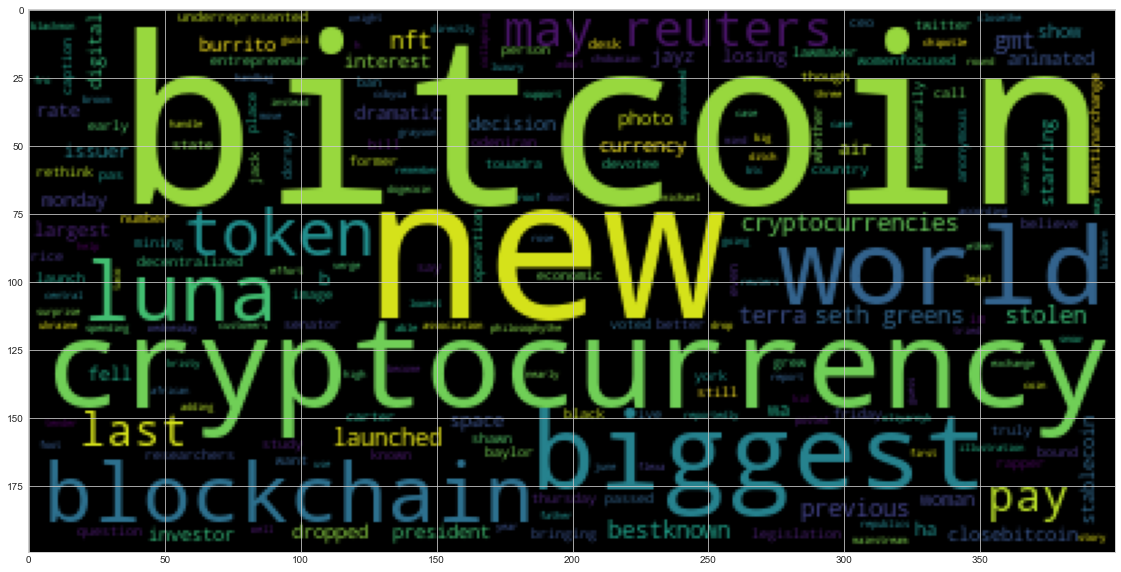

In [31]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

In [32]:
# Convert a list of tokens into a single string of tokens
eth_big_string = ' '.join([str(elem) for elem in eth_flat_word_tokenized_list ])
#print(eth_big_string)

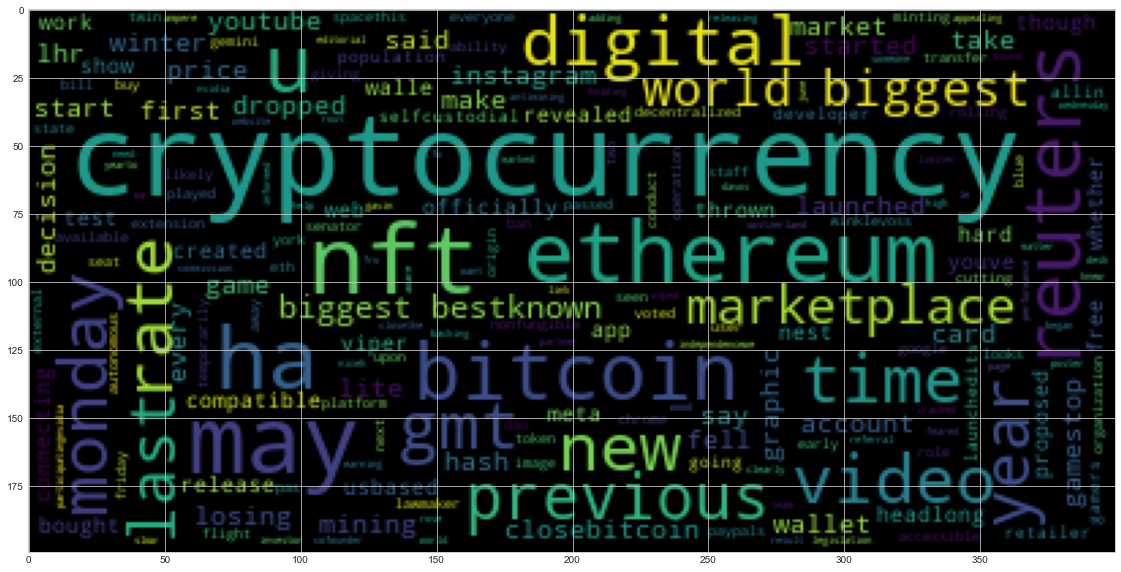

In [33]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
# Compile the list of lists of texts for each Bitcoin article
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)
    
# Convert a list of texts into a single string of texts   
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

New York lawmakers have passed a bill
 that would temporarily ban new bitcoin
 mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars] Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] Rapper and entrepreneur Shawn Carter, better known as Jay-Z, is bringing Bitcoin to the place where he grew up. On Thursday, Jay-Z and former Twitter CEO Jack Dorsey announced the launch of Bitcoin A… [+2920 chars] A new study on bitcoin calls into question whether the digital currency is truly as decentralized and anonymous as its biggest devotees would have you believe. 
 Researchers from Baylor, Rice, and t… [+7343 chars] Image caption, President Faustin-Archange Touadéra wants to rethink his country's economic philosophy
The Central African Republic's decision t

In [38]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_string)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [39]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [40]:
# List all Entities
# Get geopolitical and organizational entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

['New York', 'Odeniran', "The Central African Republic's", 'Oliyarnyk / CC-BY-SA-4.0', 'the Blockchain Association of Ukraine', 'Bitcoin', 'Reuters', 'Reuters', 'Reuters', 'Fed', 'Reuters', 'Reuters', 'Nike', 'NFT', 'NFT']


---

### Ethereum NER

In [41]:
# Concatenate all of the Ethereum text together
# Compile the list of lists of texts for each Bitcoin article
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)
    
# Convert a list of texts into a single string of texts   
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars] GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars] GameStop is going all-in on crypto. The video game retailer launched its own self-custodial Ethereum digital wallet, it said Monday. The wallet will be accessible through a Google Chrome extension an… [+1491 chars] The ability to conduct external transfers on PayPal's crypto platform, an image of which can be seen below, will start rolling out to users today and be available to everyone in the U.S. in the next … [+687 chars] A decentralized autonomous organization, or DAO, is giving away two seats on a Blue Origin flight to space.
This is likely the first time non

In [42]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_string)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [43]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [44]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

['Meta', 'Instagram', 'US', 'Instagram', 'Ethereum', 'PayPal', 'U.S.', 'DAO', 'Blue Origin', 'Gemini', 'Ethereum (Cryptocurrency', 'New York', 'Switzerland', 'Reuters', 'LHR', 'Ethereum', 'Reuters', 'Reuters', 'Reuters', 'Nvidia', 'LHR', 'Fed', 'YouTube', 'YouTube', 'NFT', 'NBA', 'NFT', 'NFT']


---